# Movies Analysis
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
Movies are a significant part of the entertainment industry, and understanding patterns in their production can provide valuable insights.
In this Note book we are going to analyze the movie data set 

### Research Question 
1. What is the distribution of movie ratings? <br>
2. Does higher budget mean higher revnue ?

<a id='wrangling'></a>
## Data Wrangling

In [54]:
# Importing the necessary libraries
import pandas as pd # for data manipulation
import numpy as np # for numerical computation
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns

In [55]:
# reading the data
data = pd.read_csv('tmdb-movies.csv')
data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [56]:
# checking the data types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [57]:
# checking for missing values
data.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

As we can see there is a lot of missing data.
The biggest missing column is "homepage" with 7930 missing values.

In [58]:
# checking for duplicates
data.duplicated().sum()

np.int64(1)

One duplicated row

## Cleaning The Data

In [59]:
# dropping duplicates
data.drop_duplicates(inplace=True)
# rechecking for duplicates
data.duplicated().sum()

np.int64(0)

In [60]:
# dropping columns that are not needed
data.drop(['id', 'imdb_id', 'homepage', 'tagline', 'overview', 'keywords'], axis=1, inplace=True)
# checking the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10865 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10865 non-null  float64
 1   budget                10865 non-null  int64  
 2   revenue               10865 non-null  int64  
 3   original_title        10865 non-null  object 
 4   cast                  10789 non-null  object 
 5   director              10821 non-null  object 
 6   runtime               10865 non-null  int64  
 7   genres                10842 non-null  object 
 8   production_companies  9835 non-null   object 
 9   release_date          10865 non-null  object 
 10  vote_count            10865 non-null  int64  
 11  vote_average          10865 non-null  float64
 12  release_year          10865 non-null  int64  
 13  budget_adj            10865 non-null  float64
 14  revenue_adj           10865 non-null  float64
dtypes: float64(4), int64(5),

In [61]:
# filling missing values in the columns "cast, director, genres, production_companies" with "Unknown"
def replace_missing_with_unknown(column):
    data[column] = data[column].fillna('Unknown')
    return data[column] # returns the column with missing values filled with "Unknown"

replace_missing_with_unknown('cast')
replace_missing_with_unknown('director')
replace_missing_with_unknown('genres')
replace_missing_with_unknown('production_companies')

# rechecking for missing values
data.isnull().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

In [ ]:
# function for plotting histograms
def plot_hist(column, title, xlabel, ylabel):
    plt.figure(figsize=(12, 6))
    sns.histplot(data[column], bins=30 , kde=True, color='blue')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# function for plotting scatter plots
def plot_scatter(x, y, title, xlabel, ylabel):
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x=x, y=y, data=data)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

### Single-Variable Analysis

### Research Question One :
What is the distribution of movie ratings?


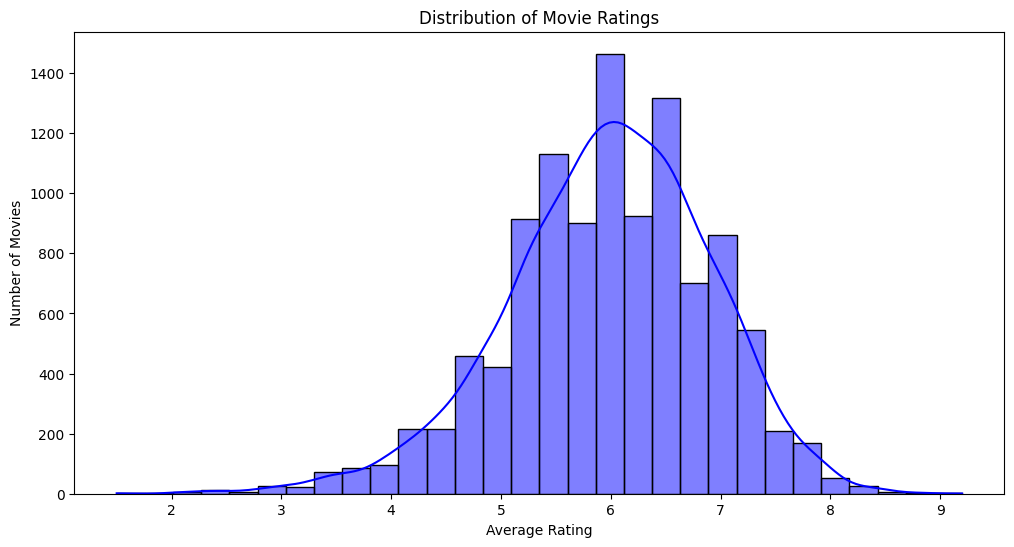

In [63]:
plot_hist("vote_average","Distribution of Movie Ratings", "Average Rating", "Number of Movies")

The histogram of movie ratings shows that most movies tend to have average ratings between 5 and 7. Very few movies receive extremely low (1-3) or extremely high (9-10) ratings. This suggests that most films fall within a moderate quality range, with only a few exceptional or very poor films.

### Double-Variable Analysis

### Research Question One :
Does higher budget mean higher revnue ?

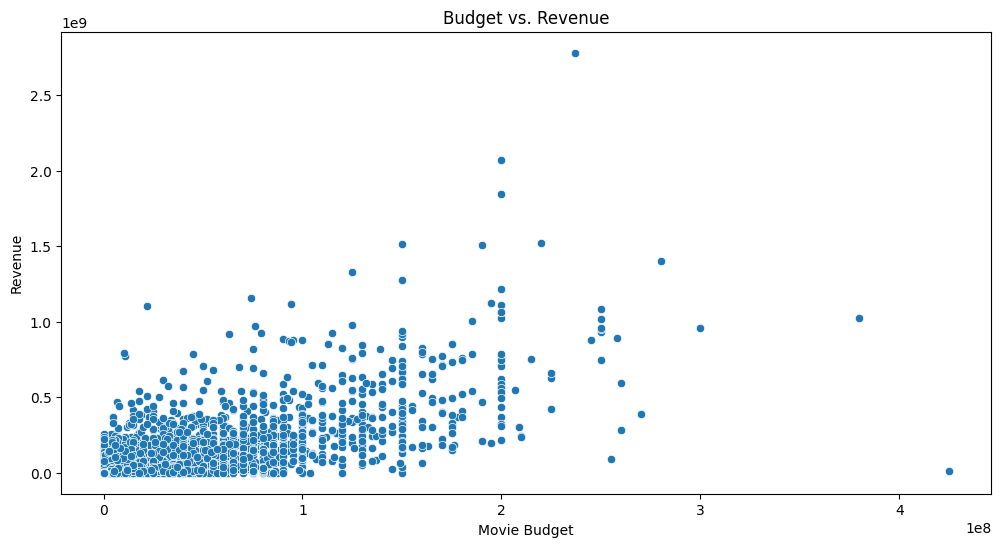

In [64]:
plot_scatter("budget", "revenue", "Budget vs. Revenue", "Movie Budget", "Revenue")

The scatter plot indicates a positive correlation between a movie’s budget and revenue—higher-budget films generally make more money. However, there are exceptions, as some low-budget movies achieved massive success, while some high-budget films flopped. This suggests that while budget plays a role in a movie’s success, it does not guarantee profitability.

<a id='conclusions'></a>
## Conclusions

Distribution of Movie Ratings (Hist Plot):<br>
The distribution of movie ratings appears to be roughly normal, with most movies receiving ratings between 5 and 7.
Very few movies have extremely low or extremely high ratings.
The peak around 6 suggests that the majority of films receive average to slightly above-average ratings.<br>

Budget vs. Revenue (Scatter Plot):
There is a general trend where higher-budget movies tend to generate higher revenue, but the relationship is not perfectly linear.
A significant number of low-budget films achieve varying levels of success, indicating that budget alone does not determine revenue.
Outliers exist where some films generate exceptionally high earnings despite a moderate budget, while others fail despite a large budget.
Distribution of Movie Ratings (Histogram):

### Limitations

Data is not enough to show more corrletions & The time was not enough to continue exploring.